## Cálculo da linha de inversão térmica do SH2 com CPA EOS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from sympy import *

In [2]:
R = 8.31447

In [3]:
def load_param():
    a = 3.47972 
    b = 0.0285 
    c = 0.41107
    Tc = 373.3 #http://webbook.nist.gov/cgi/cbook.cgi?ID=C7783064&Mask=4
    Pc = 89.70e5 
    #conversão de unidades
    a = 0.1*a
    b= b/1000
    
    association_type = '2B'
    eps = 80.8884
    beta = 0.08581
    eps = 100*eps
    
    return a,b,c,Tc,Pc,association_type, eps, beta

In [4]:
def T_calc(V):
    a,b,c,Tc,Pc,association_type, eps, beta = load_param()
    def eta_zero(T):
        eta_zero=-T*(-4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.060136124130582*V*eps*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)*exp(0.120272248261164*eps/T)/(T**2*b*beta*(exp(0.120272248261164*eps/T) - 1.0)**2) + 0.120272248261164*eps*exp(0.120272248261164*eps/T)/(T**2*sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V)))*(exp(0.120272248261164*eps/T) - 1.0)))/V + 8.31447/(V - b) - 4.157235*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V + a*c*sqrt(T/Tc)*(c*(-sqrt(T/Tc) + 1) + 1)/(T*V*(V + b)))/(-8.31447*T/(V - b)**2 - 4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(-2.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V**2*(1.0 - 0.475*b/V)) - 0.95*b**2*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V**3*(1.0 - 0.475*b/V)**2))/(b*beta*sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V)))*(exp(0.120272248261164*eps/T) - 1.0)) - 0.5*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) - 0.2375*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(V*beta*(exp(0.120272248261164*eps/T) - 1.0)))/V - 4.157235*T*(-0.475*b/(V**2*(1.0 - 0.475*b/V)) - 0.225625*b**2/(V**3*(1.0 - 0.475*b/V)**2))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V + 4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V**2 + a*(c*(-sqrt(T/Tc) + 1) + 1)**2/(V*(V + b)**2) + a*(c*(-sqrt(T/Tc) + 1) + 1)**2/(V**2*(V + b)))-V
        return eta_zero
    
    T0 = Tc
    try:
        Temp = opt.newton(eta_zero, T0, fprime=None, args=(), tol=1.48e-10, maxiter=10000, fprime2=None)
    except: ValueError
 

    return Temp

In [5]:
V0 = R*300/101325 #300K y 1 atm=101325 Pa
V0 #m3

0.02461723168023686

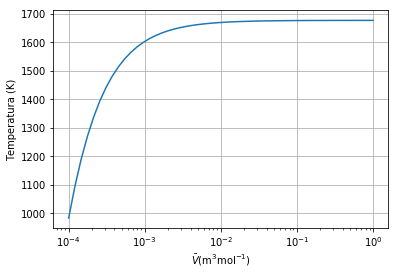

In [12]:
V_grid = np.logspace(-4,0, num=50) #-4 e zero sao os exponentes do volume
T_grid = np.zeros(len(V_grid))

for j in range (len(V_grid)):
    T_grid[j]=T_calc(V_grid[j])

plt.semilogx(V_grid,T_grid)

plt.ylabel('Temperatura (K)') 
plt.xlabel(r'$\bar{V} (\mathrm{m^{3}mol^{-1}})$')
plt.grid(True)
               
plt.show()

In [7]:
T_grid

array([ 983.36670922, 1094.13355026, 1188.71501482, 1268.91369617,
       1336.56157268, 1393.39882219, 1441.01117914, 1480.80537253,
       1514.00699987, 1541.67053658, 1564.69514603, 1583.8425696 ,
       1599.75501061, 1612.97191798, 1623.94516259, 1633.05243759,
       1640.60890196, 1646.87718382, 1652.07590456, 1656.38689864,
       1659.96130056, 1662.92465892, 1665.38122138, 1667.41751699,
       1669.10534661, 1670.50427533, 1671.66370746, 1672.62461323,
       1673.42096506, 1674.08092669, 1674.6278485 , 1675.08108431,
       1675.45667737, 1675.7679262 , 1676.02585044, 1676.23958441,
       1676.41669852, 1676.56346285, 1676.685084  , 1676.78587278,
       1676.86937214, 1676.93857745, 1676.9959371 , 1677.04344317,
       1677.08279453, 1677.11537839, 1677.14234966, 1677.16517715,
       1677.18349508, 1677.19866584])

In [8]:
def pressure_total(T,V):
    a,b,c,Tc,Pc,association_type, eps, beta = load_param()
    
    P_cubic=8.31447*T/(V - b) - a*(c*(-sqrt(T/Tc) + 1) + 1)**2/(V*(V + b))
    
    P_association=-4.157235*T*(1.0 + 0.475*b/(V*(1.0 - 0.475*b/V)))*(-0.5*V*(1.0 - 0.475*b/V)*(sqrt(1.0 + 4.0*b*beta*(exp(0.120272248261164*eps/T) - 1.0)/(V*(1.0 - 0.475*b/V))) - 1.0)/(b*beta*(exp(0.120272248261164*eps/T) - 1.0)) + 1)/V
    
    P = P_cubic-P_association
    return P

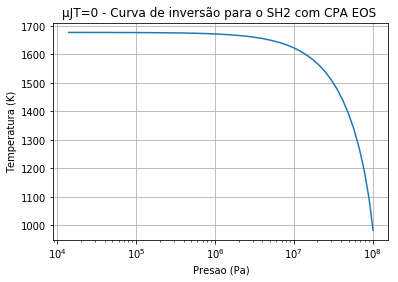

In [14]:
P_grid = np.zeros(len(V_grid))

for j in range (len(V_grid)):
    T_grid[j]=T_calc(V_grid[j])
    P_grid[j] = pressure_total(T_grid[j],V_grid[j])

plt.semilogx(P_grid,T_grid)
plt.title('μJT=0 - Curva de inversão para o SH2 com CPA EOS ')
plt.ylabel('Temperatura (K)') 
plt.xlabel('Presao (Pa)')
plt.grid(True)
plt.show()